# Example 2

The core-periphery structure detected by any algorithm can be systematic artifacts; even for networks without core-periphery structure such as regular graphs and random graphs, an algorithm labels nodes as core or periphery.

To filter out spurious core-periphery structure, this package provides an implementation of a statistical test, `q-s test`. In this notebook, we will demonstrate how to test the detected core-periphery structure using the `q-s` test.

# Core-periphery detection

We use the Borgatti Everett algorithm and karate club network for demonstration. 

In [1]:
%load_ext autoreload
%autoreload 2
import sys
import cpnet
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

Load network

In [2]:
G = nx.karate_club_graph()
print(nx.info(G))

Name: Zachary's Karate Club
Type: Graph
Number of nodes: 34
Number of edges: 78
Average degree:   4.5882


Detect the core-periphery structure in the karate club network: 

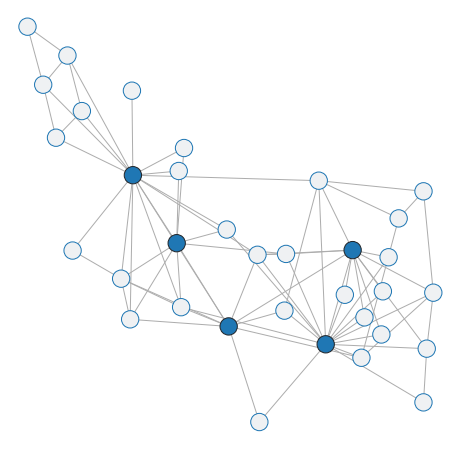

In [3]:
be = cpnet.BE()  # Load the instance of the BE algorithm
be.detect(G)  # Detect core-periphery structures
c = be.get_pair_id()  # Get the group membership of nodes
x = be.get_coreness()  # Get the coreness of nodes

# Visualization
fig = plt.figure(figsize=(8, 8))
ax = plt.gca()
ax, pos = cpnet.draw(G, c, x, ax)

# Statistical test

Is this core-periphery structure significant? To answer this question, the `q-s` test generates many randomized networks and detect core-periphery structure with the algorithm used to detect the core-periphery structure in question. 
The core-periphery structure detected for the input network is considered as significant if it is stronger than those detected in randomized networks. 

While explaining the test needs dozens of words, executing it needs just several lines: 

In [5]:
sig_c, sig_x, significant, p_values = cpnet.qstest(
    c, x, G, be, significance_level=0.01, num_of_thread=1
)

100%|██████████| 300/300 [00:02<00:00, 143.16it/s]


In [6]:
significant

[False]

The `sig_c` and `sig_x` are the results of the statistical test, where `sig_c[i] = None` and `sig_x[i] = None` mean that node i is the *residual node*, i.e., nodes that do not belong to the significant core-periphery structure. 

Let's see the results o f the test.

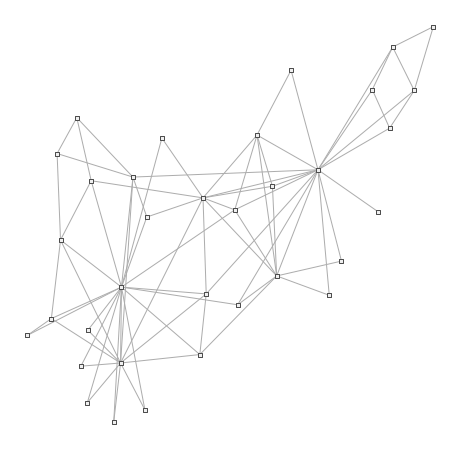

In [ ]:
# Visualization
fig = plt.figure(figsize=(8, 8))
ax = plt.gca()
ax, pos = cpnet.draw(G, sig_c, sig_x, ax, pos=pos)

The rectangles indicate nodes that do not belong to any significant core-periphery structure. Since all nodes are rectangles, the detected core-periphery structure is not statistically significant. 

What does it mean? The BE algorithm detected a structure, where core nodes are densely interconnected while peripheral nodes are sparsely interconnected, which, by itself, agrees with the notion of core-periphery structure. That being said, compared to core-periphery structure detected in randomized networks, the d

This result alone does not imply that there is no core-periphery structure in the karate-club network. It is just that the network deos not have strong core-periphery structure that BE algorithm aims for. Different algorithms may find different kinds of *significant* core-periphery structure. To see this, let us try the KM-config algorithm. 

100%|██████████| 300/300 [00:01<00:00, 161.33it/s]


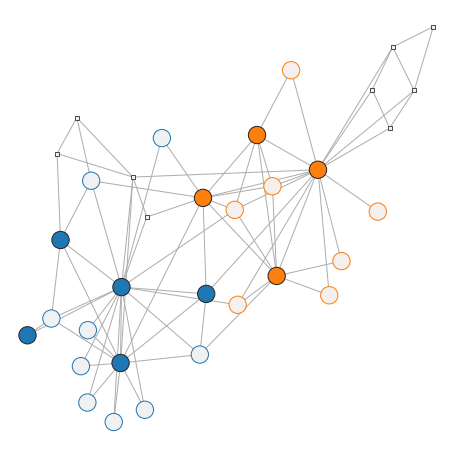

In [ ]:
kmconfig = cpnet.KM_config()  # Call the KM-config algorithm
kmconfig.detect(G)  # Detect core-periphery structures
c = kmconfig.get_pair_id()  # Get the group membership of nodes
x = kmconfig.get_coreness()  # Get the coreness of nodes

# Significance test
sig_c, sig_x, significant, p_values = cpnet.qstest(
    c, x, G, kmconfig, significance_level=0.01, num_of_thread=4
)

# Visualization
fig = plt.figure(figsize=(8, 8))
ax = plt.gca()
ax, pos = cpnet.draw(G, sig_c, sig_x, ax, pos=pos)

It sounds like contradicting that one algorithm finds significant core-periphery structure while another algorithm does not. This is because different algorithms aim for different kinds of core-periphery structure, as demonstrated in this example.